<a href="https://colab.research.google.com/github/JoeVonDahab/Deep-Learning-Class/blob/main/First_Project_Deep_Learning_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Homework: Implementing simple learning algorithms


> **Due Date: February 5th, 2025 by 1 pm**
>
> Please turn in this completed notebook as an attachment or as a shared link to clay.smyth@ucsf.edu

**Collaboration policy and more**

You're welcome (and highly encouraged) to work with and discuss this homework assignment with others in the class, and feel free to use any resources (textbooks, online notebooks, etc). The only requirement is that the final notebook that you turn in must be your own written work (no copy and pasting, please).

**Overview**



## Before you get started

**1) How to run this notebook**

This Jupyter Notebook can be used in two ways:
* *Option 1: Download the notebook*

  We've included all the imports necessary for this homework. Please make sure you're running Python 3 with PyTorch (and Torchvision) installed and ready to go, along with NumPy and Matplotlib. Although you might find that these models train a bit faster on GPU, this homework assignment should be doable on most modern laptops. If you're having trouble please let us know ASAP.

* *Option 2: Run it online on Google Colaboratory*

  - Colab gives access to a GPU, so it could be useful in case you don't have CUDA installed on your computer (**Note: you can use this as an opportunity to get started on GPU training, but we recommend you develop your model and make sure everything works on CPU first**)
  - Make a copy of this notebook in your Google Drive folder: "File" -> "Save a copy in Drive..."
  - By default, Colab does not make GPUs available, but you can easily access them by selecting GPU in "Runtime" -> "Change runtime type..."
  - Remember that Colab runs in a temporary virtual machine, so all the data created while running the notebook will be lost at the end of the session, or when the runtime disconnects due to inactivity. To preserve data between sessions, there are a couple of options:
    * you can link Colab to your personal Google Drive by mounting it on your runtime, see first cell below.
    * you can download/upload files from the Files tab on the right sidebar.

**3) How to complete this assignment**

  - Fill out the relevant code blocks as indicated
  - Answer questions by writing them directly in the text block. Please keep your written answers concise, most are meant to be answered in a sentence or two.
  - Make figures showing your results and add comments with your observations.
  - Some code is provided for you. Feel free to amend provided code as necessary to complete the assignment. Your implementation for specific portions may require changes to the provided code, which is OK.

***Let's start!***

---

The following command can be used to mount your personal Google Drive folder on the temporary virtual machine, so you can recover data between sessions (follow the instructions, you'll need an authorization code). Additional info [here](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=u22w3BFiOveA).


In [ ]:
# # Skip this cell if running locally
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# Import all the necessary libraries
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

# %matplotlib inline

# from IPython.display import Image, display

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import random_split, TensorDataset, DataLoader

> **Question 0) Why is it important to set the seed for the random number generator?**

for results reproducability


In [ ]:
random_seed = 5 # Feel free to pick your favorite number
np.random.seed(random_seed)

### 1. **Simple Regression Task Setup**

We will begin this homework by using gradient descent to accomplish a single-variate regression task.

Regression is a statistical technique for estimating one (dependent) variable from one, or more, other (independent) variables. Here, we will use basic machine learning methodologies to estimate an affine relationship between two variables.

Recall the equation of a line:





$$
y = mx + b
$$



We would like to reformulate this equation into linear alegebra notation, which can be accomplished with the following:

$$
y = \begin{bmatrix}
m & b
\end{bmatrix}
\begin{bmatrix}
x \\
1
\end{bmatrix}
$$



> **Question 1a) What variables in the above equation are the weights we would like to learn?**

b and m


> **Question 1b) Draw the regression task in the form of a neural network.**

Because our regression task is a matrix multiplication followed by an activation function (the identity function), it can be formulated as a very simple artificial neural network with no hidden layers. Attempt to draw the network diagram of our regression task. Feel free to embed an image.

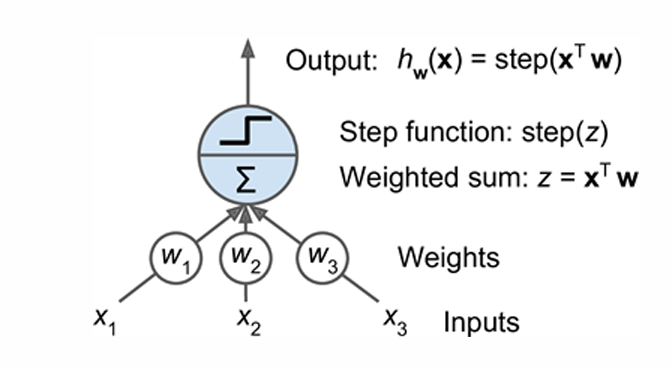

Let's begin.

First, let's create a random line that we would like to estimate.

Line parameters: m=4, b=7



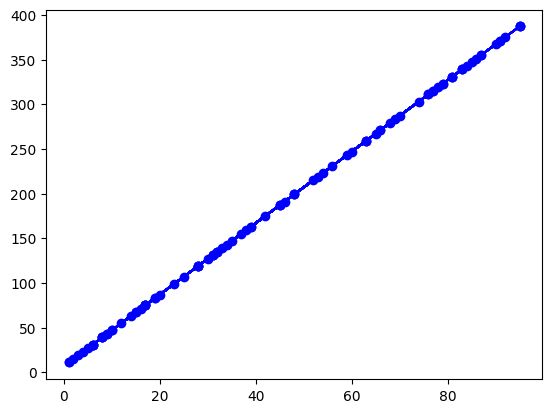

In [ ]:
# Creating random slope and intercept to act as our line parameters
m, b = np.random.randint(1, 11), np.random.randint(1, 11)

# Generate a set of 100 (X,Y) coordinates that share the relationship y=mx+b
x = np.random.randint(1,101, size=100)
y = m * x + b
print(f"Line parameters: m={m}, b={b}")
print("")

# Plot the (X,Y) points as a line plot using matplotlib
plt.plot(x, y, label='Line Plot', color='blue', marker='o')

Data is always messy. Let's add some noise to our Y vector to resemble a dataset which we "measured" from the real world, and visualize the new results.

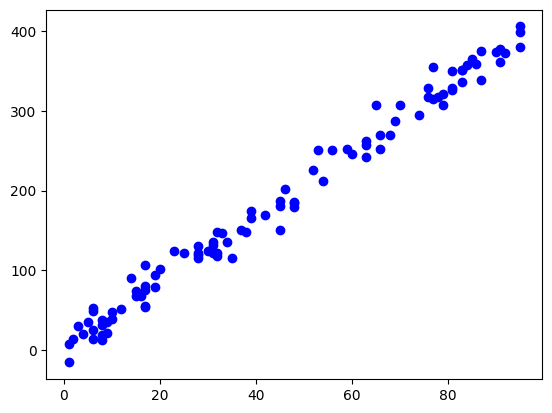

In [ ]:
# Add noise to our y-vector
mu, sigma = 0, 15
noise_vector = np.random.normal(mu, sigma, 100)
y_measured = y + noise_vector

# Plot the (X,Y) points as a scatter plot using matplotlib
plt.scatter(x, y_measured, label='Line Plot', color='blue', marker='o')

Now, we would like to estimate the line parameters which best fit our noisy, observed data. We will accomplish this by starting with random weights and updating those weights using gradient descent. We also need to define how "bad" our model is with a loss function.



In [ ]:
# Initialize random model weights
def initialize_model(num_weights=2):
  weights = []
  for i in range(num_weights):
    weights.append(np.random.randint(1, 11)) # Only select integers between 1-10.
  return np.array(weights)

In [ ]:
weights = initialize_model() # Includes bias term
print(f"Random Weights: m={weights[0]}, b={weights[1]}")

Random Weights: m=2, b=4


In [ ]:
# Define your prediction function. This function should return a vector of size x, predicting the y-values.
def predict(weights, x):
    x = np.array(x)  # Ensure x is a NumPy array
    weights = np.array(weights)  # Ensure weights are a NumPy array

    w = weights[:-1]
    b = weights[-1]
    if len(x.shape) == 1:
        x = x.reshape(-1, 1)

    y = np.dot(x, w) + b  # Each row in x is multiplied by w, then summed with b

    return y

In [ ]:
#testing code

model_example = initialize_model(2)
print(model_example)
x_example = [[1],
    [5],
     [5]]
print(predict(model_example, x_example))

[10  4]
[14 54 54]


In [ ]:
print(x.shape, y_measured.shape, weights.shape)
predict(weights, x)

(100,) (100,) (2,)


array([ 38, 152,  22, 130,  60,  66, 166,  20, 158,  36, 112, 166,  60,
        94, 160, 156, 136, 100,  66, 174, 178,  42,  24,  88, 130,   8,
       170,  38, 162,  16, 122,   6, 166,  14,  78, 108,  60,  68,  10,
       142,  82, 172,  44,  42,  20,  66, 130,  28, 140, 136, 116,  12,
       188, 162,  60,  64,  72, 184, 176,  20,  38, 194,  34, 186,  68,
        24,  82, 100,  38,  16,  74,  96, 124,  54,  32,  68,  70, 158,
        94,  16,  34, 100, 194, 170,   6,  20, 178,  38, 134,  22, 186,
        94,  80, 194, 156,  16,  50, 110, 144, 170])

Let's visualize our untrained model's predictions alongside our target data (y_measured).

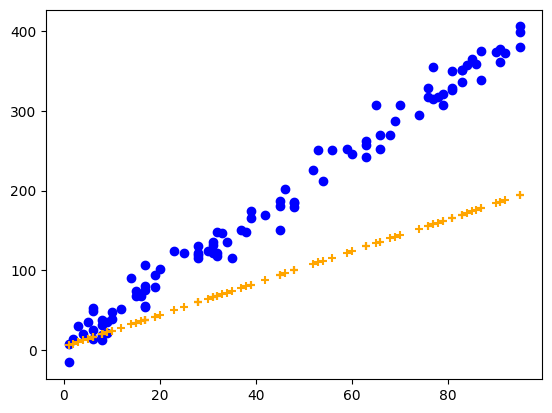

In [ ]:
plt.scatter(x, y_measured, label='Line Plot', color='blue', marker='o')
plt.scatter(x, predict(weights, x), color='orange', marker='+')

Next, we need to define a loss function to quantify how "bad" our current model is at predicting our desired data points.

In [ ]:
# Implement the training loop that utilizes gradient descent.
# This function will return the trained model weights and list of loss values
def train(x, y_measured, learning_rate, num_steps):
  if x.ndim == 1:
    number_of_weights = 1
  else:
    number_of_weights = x.shape[1]
  weights = initialize_model(number_of_weights+1)
  w = weights[:-1]
  b = weights[-1]

  # We will save our losses to plot a loss curve
  losses = []

  for i in range (num_steps):
    predictions = predict(weights, x)
    _1loss = find_loss(predictions, y_measured)
    losses.append(_1loss)
    dj_w, dj_b = gradient_func(x, y_measured, predictions)
    w, b = take_step(w, b, dj_w, dj_b, learning_rate)
    weights[:-1] = w
    weights[-1] = b
    t = int(num_steps / 20)
    if i % t  == 0:
      print(f'Loss at step {i} is {losses[i]}, weights are {w}, {b}')

  return weights, losses


> **Question 1c) What would be a reasonable loss function for our model and observations?**

least mean square error

In [ ]:
# Define loss function
def find_loss(predictions, targets):
  loss = np.mean((predictions - targets)**2)
  return loss

Let's see the loss of your untrained model.


In [ ]:
predictions = predict(weights, x)
print(find_loss(predictions, y_measured))

235.0894590684594


Not great! We'll do better after training.

### 2. **Training our Regression**

Now that we have set-up our problem statement, collected data, and defined our model and loss function, we would like to train our model to minimize the loss function. We will accomplish this using gradient descent.

Recall that the gradient is the derivative of the loss function with respect to each weight (or parameter) in our model. The gradient takes the form of a vector.

> **Question 2a) In a few sentences, describe gradient descent?**

gradient decscent is an alogrithm that uses partial dervative of the loss function and substract it from the weights in order to find minimum loss value possible

when loss is at minimum value or the error between prediction and true value is at minimum then the model is fitting the data the best

> **Question 2b) What are the partial derivatives of your loss function with respect to each model parameter?**

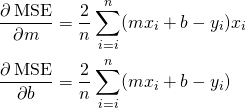

In [ ]:
def gradient_func(x, y, predictions):
    m = y.shape[0]  # Number of samples
    error = predictions - y  # Compute error vector

    # Compute gradients correctly
    dj_W = (2 / m) * np.dot(x.T, error)
    dj_b = (2 / m) * np.sum(error)

    return dj_W, dj_b

In [ ]:
X_X = np.array([[1, 2], [3, 4], [5, 6]])  # (3 samples, 2 features)
y_X = np.array([10, 20, 30])  # True values
weights_x = np.array([0.5, 6, 0.1])  # Initial weights (2 features + bias)

# Compute predictions
predictions_x = predict(weights_x, X_X)

# Compute gradients
dj_W, dj_b = gradient_func(X_X, y_X, predictions_x)

print("Gradient for weights:", dj_W)
print("Gradient for bias:", dj_b)

Gradient for weights: [41.6 52.8]
Gradient for bias: 11.200000000000003


In [ ]:
# Implement a "step" function, which adjusts the model weights based upon the gradient and step size
def take_step(w, b , dw, db, learning_rate):
  w = w - learning_rate * dw
  b = b - learning_rate * db
  return w, b

In [ ]:
x.shape

(100,)

In [ ]:
# Define our learning rate (i.e. step size) to use in gradient descent algorithm
learning_rate = 1e-8

# Define number of steps to take in gradient descent training
num_steps = 100000

# Train our model
weights, losses = train(x, y_measured, learning_rate, num_steps)

Loss at step 0 is 3895.315177344037, weights are [3.00006471], 1.0000010272639284
Loss at step 5000 is 3895.315177344037, weights are [3.32361454], 1.005137346905758
Loss at step 10000 is 3895.315177344037, weights are [3.64716436], 1.0102736665475878
Loss at step 15000 is 3895.315177344037, weights are [3.97071419], 1.0154099861894175
Loss at step 20000 is 267.9286375466141, weights are [4.03566612], 1.0165094792304188
Loss at step 25000 is 267.9286375466141, weights are [4.07485495], 1.0172067988713376
Loss at step 30000 is 267.9286375466141, weights are [4.11404378], 1.0179041185122564
Loss at step 35000 is 267.9286375466141, weights are [4.15323261], 1.0186014381531752
Loss at step 40000 is 267.9286375466141, weights are [4.19242143], 1.019298757794094
Loss at step 45000 is 267.9286375466141, weights are [4.23161026], 1.0199960774350127
Loss at step 50000 is 267.9286375466141, weights are [4.27079909], 1.0206933970759315
Loss at step 55000 is 267.9286375466141, weights are [4.30998

Let's visualize our loss curve and resultant trained model.

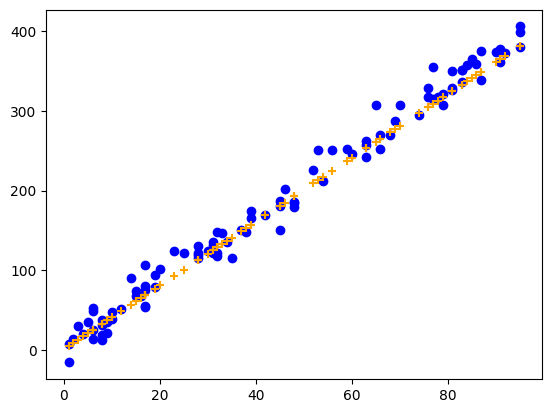

In [ ]:
plt.scatter(x, y_measured, label='Line Plot', color='blue', marker='o')

plt.scatter(x, predict(weights, x), color='orange', marker='+')

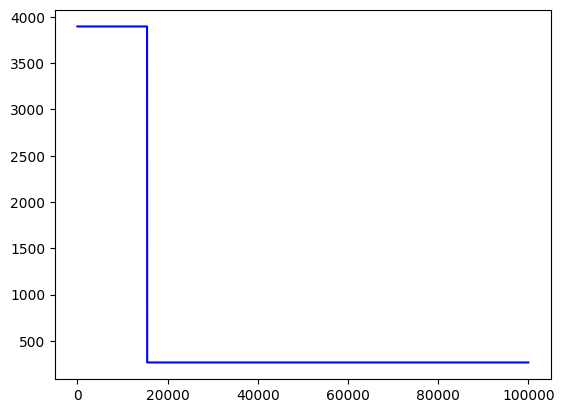

In [ ]:
# Plot your loss function.
plt.plot(np.arange(len(losses)), losses, label='Loss Plot', color='blue')

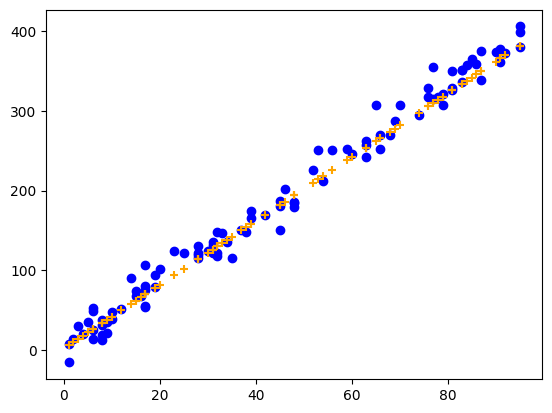

In [ ]:
# Plot the model overlaid on the (x, y_measured) data points
plt.scatter(x, y_measured, label='Line Plot', color='blue', marker='o')
plt.scatter(x, predict(weights, x), color='orange', marker='+')

How close to the actual model parameters are we? You should pass the assertion below.

In [ ]:
print(f"Actual model parameters: m={m}, b={b}")
print(f"Trained model parameters: m={weights[0]}, b={weights[1]}")

assert np.isclose(weights[0], m, rtol=0.1)

Actual model parameters: m=4, b=1.280286392826401
Trained model parameters: m=4, b=2


Much better!

> **Question 2c) What happens if you increase the learning rate?**

You may notice things go awry if the learning rate is too high... describe what is happening below.

the loss value will continue to flactuate and may not be able to reach global minimum, it will keep bouncing between higher values on the side of global minimum

### 3. Reporting Results

When training a model for classification for regression, we typically do not use the entire dataset for training. It is customary to split the dataset into a training set and test set.

> **Question 3a) Explain why we do not report model results on the training data? What is data leakage?**

the model may have overfitted the model on the training data, if you have another unseen data for validation and/or testing you can test and prevent overfitting

data leakage is when you overfit the model on the test data, which should be the last step to test the model on to make sure you have not modified the model to fit the test data specifically

In the code cell below, split the data set (x, y_measured) into training and test sets. Train the model on the training set and report your loss on the test set.

Loss at step 0 is 24027.17257987207, weights are [1.000159], 9.00000255810481
Loss at step 5000 is 24027.17257987207, weights are [1.79518067], 9.01279308215804
Loss at step 10000 is 10776.42668993965, weights are [2.39354254], 9.022400495958285
Loss at step 15000 is 10776.42668993965, weights are [2.92359546], 9.030902270007493
Loss at step 20000 is 2825.0558000072288, weights are [3.22688812], 9.03573373181086
Loss at step 25000 is 2825.0558000072288, weights are [3.49197229], 9.039946755864927
Loss at step 30000 is 2825.0558000072288, weights are [3.75705646], 9.044159779918994
Loss at step 35000 is 173.059910074808, weights are [4.00004223], 9.048015122222726
Loss at step 40000 is 173.059910074808, weights are [4.00015765], 9.04793939627277
Loss at step 45000 is 173.059910074808, weights are [4.00027307], 9.047863670322815
Loss at step 50000 is 173.059910074808, weights are [4.00038849], 9.04778794437286
Loss at step 55000 is 173.059910074808, weights are [4.00050391], 9.0477122184

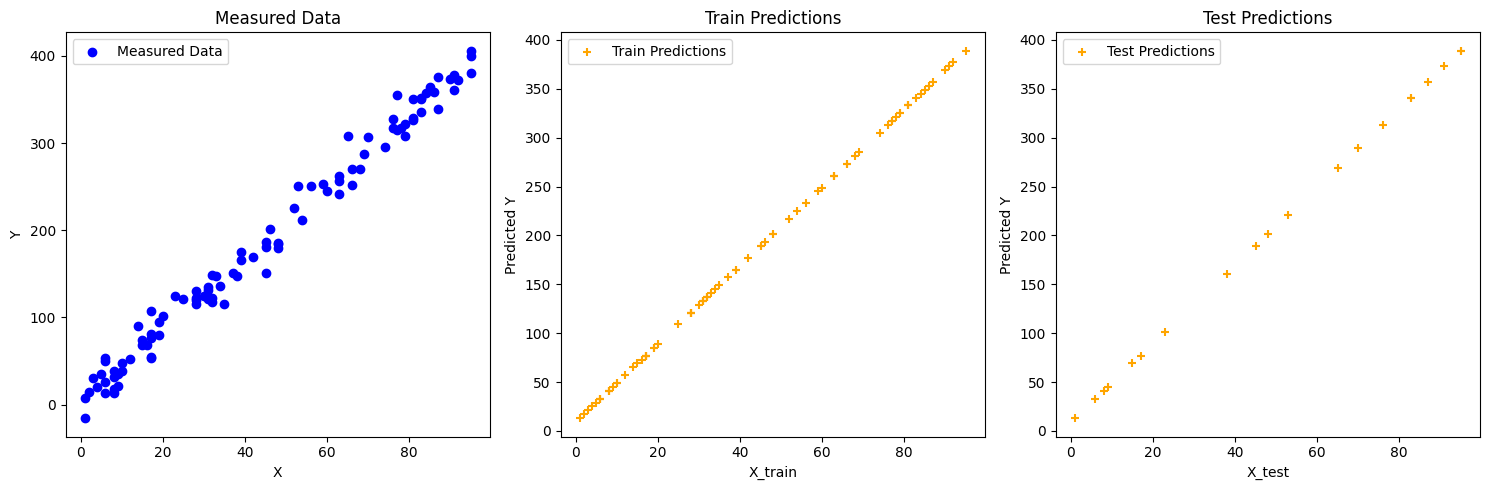

In [ ]:
# Split dataset and report results on test set
# Your code here...

def split_to_test(x, y, train_ratio=0.8):
  train_size = int(train_ratio * len(y))
  x_train, x_test = x[:train_size], x[train_size:]
  y_train, y_test = y[:train_size], y[train_size:]

  return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = split_to_test(x, y_measured)
# Define our learning rate (i.e. step size) to use in gradient descent algorithm
learning_rate = 1e-8

# Define number of steps to take in gradient descent training
num_steps = 100000
weights, losses = train(x_train, y_train, learning_rate, num_steps)

predictions = predict(weights, x_test)
print(find_loss(predictions, y_test))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create 1 row, 3 columns of subplots

# First Scatter Plot: Original Data
axes[0].scatter(x, y_measured, color='blue', marker='o', label='Measured Data')
axes[0].set_title("Measured Data")
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")
axes[0].legend()

# Second Scatter Plot: Training Predictions
axes[1].scatter(x_train, predict(weights, x_train), color='orange', marker='+', label='Train Predictions')
axes[1].set_title("Train Predictions")
axes[1].set_xlabel("X_train")
axes[1].set_ylabel("Predicted Y")
axes[1].legend()

# Third Scatter Plot: Test Predictions
axes[2].scatter(x_test, predict(weights, x_test), color='orange', marker='+', label='Test Predictions')
axes[2].set_title("Test Predictions")
axes[2].set_xlabel("X_test")
axes[2].set_ylabel("Predicted Y")
axes[2].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### 4. **N-dimensional Regression**

Let's move into a more complex regression task.

We will now train an n-dimensional polynomial. The equation of interest is:

$$
y = w_{n}x^{n} + w_{n-1}x^{n-1} + w_{n-2}x^{n-2} + ... + w_1x + w_0
$$

Your task is to use Pytorch to train an N-dimensional polynomial regression model. We will essentially follow the steps defined above, but leverage Pytorch's API to accomplish the model training.

Succinctly, we need to do the following:


1.   Define learning parameters (learning rate, number of gradient steps)
2.   Define our model architecture (using pytorch nn module)
3.   Define our optimization scheme (using pytorch optim module)
4.   Define a training loop (i.e. where gradient descent takes place)
5.   Split our dataset into train-test splits
6.   Train the model on the training set.
7.   Evaluate model on the test set



> **Question 4a) What is the above equation when reformulated in linear algebra notation? Also, repeat Questions (1a) (1b) and (2b) for this problem statement.**

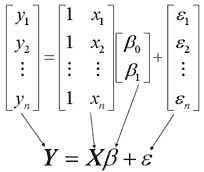

we are trying to learn the W weights from W0 to to Wn-1 or beta in this equation and also e which is the bias term

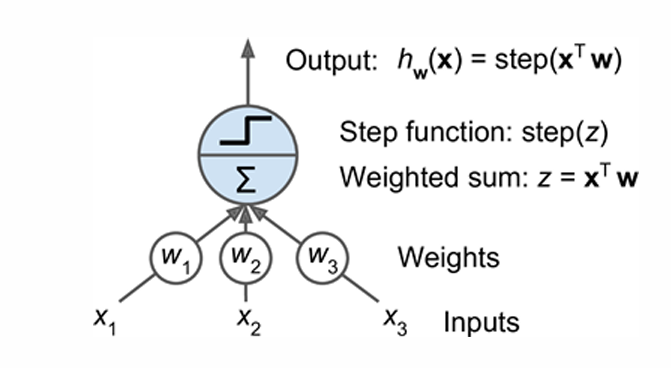


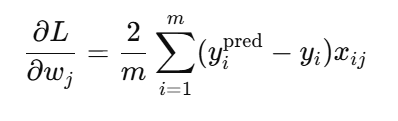

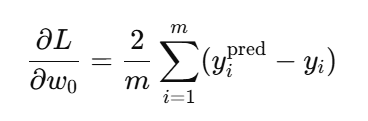

First, let's re-establish our data set with a higher degree polynomial.


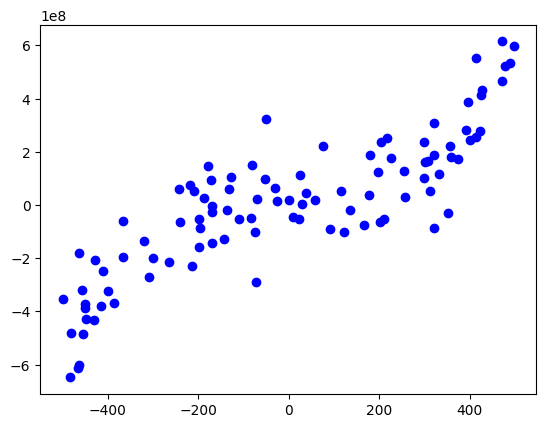

In [ ]:
# Let's pick the polynomial degree
degree = 3 # Choose a number that suites you (Warning: code may become unstable with too high of a polynomial though)
num_weights = degree + 1 # Include w_0 (i.e the bias term)

# Creating a random model
true_weights = initialize_model(num_weights=num_weights) # We are using the intialize_model func to generate a random polynomial

# Generate a set of 100 (X,Y) coordinates that share the polynomial relationship
num_data_points = 100
upper_limit = 500
lower_limit = -500
x = np.random.randint(lower_limit, upper_limit, size=num_data_points)
y = np.sum(np.array([true_weights[i] * x**(degree - i) for i in range(len(true_weights))]), axis=0)

# Add noise to our y-vector
mu, sigma = 0, upper_limit**degree # We will make the noise commensurate with the polynomial degree
noise_vector = np.random.normal(mu, sigma, num_data_points)
y_measured = y + noise_vector

# Plot the (X,Y) points as a line plot using matplotlib
plt.scatter(x, y_measured, color='blue', marker='o')

Now, lets create our features (i.e. the polynomial terms)

In [ ]:
# Step 0: Transform input vector x to include polynomial terms (1, x, x^2, x^3, .. x^(n-1), x^n)
def polynomial_features(x, degree):
    # Create a matrix with shape (len(x), degree + 1)
    X_poly = np.ones((len(x), degree + 1))

    # Fill columns from highest degree to lowest
    for d in range(degree):
        X_poly[:, d] = x ** (degree - d)  # Highest degree first

    return X_poly

bd = [1,2,3]

X_poly = polynomial_features(x, degree)

print (X_poly)

[[ 7.04449970e+07  1.70569000e+05  4.13000000e+02  1.00000000e+00]
 [ 2.46037500e+06  1.82250000e+04  1.35000000e+02  1.00000000e+00]
 [ 7.62250240e+07  1.79776000e+05  4.24000000e+02  1.00000000e+00]
 [-9.98973440e+07  2.15296000e+05 -4.64000000e+02  1.00000000e+00]
 [-8.93146230e+07  1.99809000e+05 -4.47000000e+02  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [-3.89017000e+05  5.32900000e+03 -7.30000000e+01  1.00000000e+00]
 [ 2.64635920e+07  8.88040000e+04  2.98000000e+02  1.00000000e+00]
 [-9.12932900e+06  4.36810000e+04 -2.09000000e+02  1.00000000e+00]
 [ 4.21875000e+05  5.62500000e+03  7.50000000e+01  1.00000000e+00]
 [ 7.51514480e+07  1.78084000e+05  4.22000000e+02  1.00000000e+00]
 [-7.76239200e+06  3.92040000e+04 -1.98000000e+02  1.00000000e+00]
 [-4.82680900e+06  2.85610000e+04 -1.69000000e+02  1.00000000e+00]
 [ 8.36542700e+06  4.12090000e+04  2.03000000e+02  1.00000000e+00]
 [-6.94265310e+07  1.68921000e+05 -4.11000000e+02  1.00000000e

Now, we accomplish Steps 1-4 from above.

In [ ]:
# Step 1: Define training parameters
torch.manual_seed(random_seed)
learning_rate = 1e-6
num_epochs = 1000

In [ ]:
# Step 2: Create your model using nn.Linear, starting with our random model weights
# Do not include a bias term, because it's included in polynomialization portion.
  # Ensure correct shape
model = nn.Linear(in_features=degree + 1, out_features=1, bias=False)


> **Question 4b) What is your activation function for this neural network?**

no activation function since its linear regression model, or its just linear activation function where z = X.W + B and f(z) = z

In [ ]:
# Step 2a: Add randomly initialized weights to our model
# (typically this is not necessary, but aligns this problem more closely with Section 3)
weights = initialize_model(num_weights=num_weights)
model.weight.data = torch.tensor(weights, dtype=torch.float32).view(1, -1)

print(f"Random weights: {model.weight.data} shaepe {model.weight.data.shape}")
# Initialize model weights to the same ones used for data generation


Random weights: tensor([[2., 9., 4., 4.]]) shaepe torch.Size([1, 4])


In [ ]:
# Step 3: Define loss function and optimizer from relevant pytorch classes.
# Note, we will want to use Stochastic Gradient Descent for the pytorch implementation

criterion = nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=learning_rate)
optimizer = optim.Adam(model.parameters(), lr=1e-1)

In [ ]:
# Step 4: Create the training loop

def train(train_dataset, model, optimizer, num_epochs, batch_size=None):
    """
    Trains a PyTorch model on a dataset using MSE loss.

    Parameters:
    - dataset: Tuple (X, y) where X is input features and y is target values.
    - model: PyTorch nn.Module (e.g., `nn.Linear`)
    - optimizer: Optimizer (e.g., `torch.optim.SGD`)
    - num_epochs: Number of training iterations
    - batch_size: If provided, enables mini-batch training

    Returns:
    - Loss history (list of losses over epochs)
    """
    X, y = train_dataset
    X = torch.tensor(X, dtype=torch.float32)  # Convert to tensor
    y = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Ensure correct shape

    # Loss function: Mean Squared Error (MSE)
    criterion = nn.MSELoss()

    # Use DataLoader for batching if batch_size is provided
    if batch_size:
        data_loader = DataLoader(TensorDataset(X, y), batch_size=batch_size, shuffle=True)
    else:
        data_loader = [(X, y)]  # Full-batch training (one iteration per epoch)

    loss_history = []  # Store loss values for visualization

    for epoch in range(num_epochs):
        epoch_loss = 0.0  # Track loss for this epoch

        for batch_X, batch_y in data_loader:
            optimizer.zero_grad()  # Reset gradients to zero
            predictions = model(batch_X)  # Forward pass
            loss = criterion(predictions, batch_y)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights

            epoch_loss += loss.item()

        # Save loss per epoch
        loss_history.append(epoch_loss / len(data_loader))

        # Print loss every 10% of total epochs
        if epoch % (num_epochs // 10) == 0:
            print(f"Epoch {epoch}/{num_epochs} - Loss: {loss_history[-1]:.4f}")

    return loss_history


Now call your train function. We need to convert our dataset from numpy to torch datatypes.

In [ ]:
# Step 5: Create a train-test split
def train_test_split(X, y, train_ratio=0.8):
  train_size = int(train_ratio * len(X))
  train_dataset = (X[:train_size, :], y[:train_size])
  test_dataset = (X[train_size:, :], y[train_size:])

  return train_dataset, test_dataset


In [ ]:
print(f"X_poly shape: {X_poly.shape}")  # Should be (num_samples, 4)
print(f"Model weights shape: {model.weight.shape}")  # Should be (1, 4)


X_poly shape: (100, 4)
Model weights shape: torch.Size([1, 4])


In [ ]:
# Step 6: Call training loop
num_epochs = 1000
train_dataset, test_dataset = train_test_split(X_poly, y_measured)
losses = train(train_dataset, model, optimizer, num_epochs)

Epoch 0/1000 - Loss: 31063711745572864.0000
Epoch 100/1000 - Loss: 13069259064213504.0000
Epoch 200/1000 - Loss: 13037439799001088.0000
Epoch 300/1000 - Loss: 13009664245497856.0000
Epoch 400/1000 - Loss: 12985514718134272.0000
Epoch 500/1000 - Loss: 12964657283203072.0000
Epoch 600/1000 - Loss: 12946774113124352.0000
Epoch 700/1000 - Loss: 12931573150121984.0000
Epoch 800/1000 - Loss: 12918769852612608.0000
Epoch 900/1000 - Loss: 12908093637656576.0000


Let's visualize the results

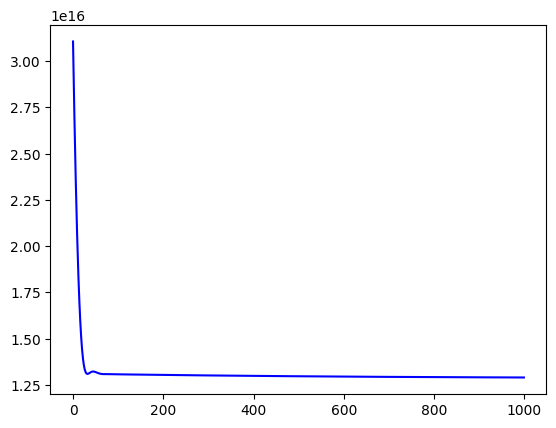

In [ ]:
plt.plot(np.arange(len(losses)), losses, label='Loss Plot', color='blue')

In [ ]:
trained_weights = model.weight.data.numpy().flatten()  # Convert to NumPy array

print(f"Trained Weights: {trained_weights}")

Trained Weights: [ 4.541449 89.27941  19.327242 89.00446 ]


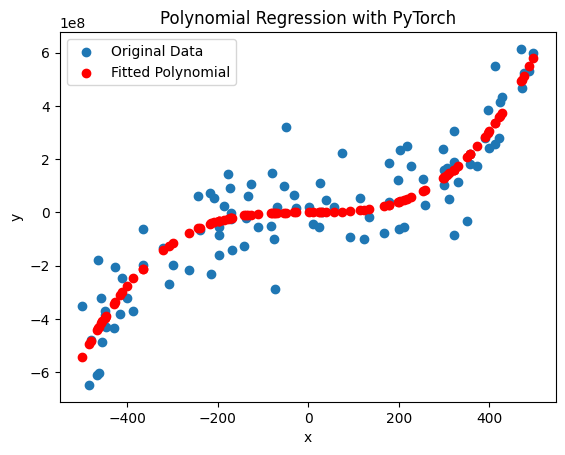

In [ ]:
# Plot data and predictions
predictions = X_poly @ trained_weights
with torch.no_grad():
    plt.scatter(x, y_measured, label="Original Data")
    plt.scatter(x, predictions, color="red", label="Fitted Polynomial")
    plt.legend()
    plt.title("Polynomial Regression with PyTorch")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

Report your results on the test test. Write an evaluation function that evaluates your model performance.

In [ ]:
def evaluate(test_dataset, model, criterion):
    # Set the model to evaluation mode
    model.eval()

    # Your code here

    print(f"Test MSE Loss: {test_loss.item():.4f}")
    return test_loss.item()

In [ ]:
# Step 7: Evaluate model
evaluate(test_dataset, model, criterion)

Test MSE Loss: 13667564114673664.0000


1.3667564114673664e+16

Sometimes loss can be hard to interpret. How close are your model parameters to the true paramters?

In [ ]:
print(f"Actual model parameters: {true_weights}")
print(f"Trained model parameters: {model.weight.data.numpy()}")

flattened = model.weight.data.numpy().flatten()
print (flattened)

Actual model parameters: [5 6 4 1]
Trained model parameters: [[ 4.541449 89.27941  19.327242 89.00446 ]]
[ 4.541449 89.27941  19.327242 89.00446 ]


In [ ]:
assert np.isclose(flattened, true_weights, rtol=10, atol=100).all(), "Values are too different!"


> **Question 4c) Out of all the model weights, it is likely the case that your trained model's first weight is the closest to the true model parameter. Why might this be the case?**

The first weight in my trained model is the closest to the true weight because it corresponds to the highest-degree term in the polynomial, which has the most significant impact on predictions. Higher-degree terms in polynomial regression tend to dominate the function's behavior, meaning small changes in their coefficients can lead to large differences in outputs. Conversely, lower-degree terms (like the intercept) are more influenced by noise and optimization challenges, making their learned values more variable. Additionally, gradient descent often converges more accurately for dominant terms, while lower-order terms may be harder to fine-tune due to their smaller overall effect on loss reduction.






### 5. **Real world regression task**

Let us now apply our knowledge towards a real-world regression task.

Our goal in this final section will be to develop a regression model for the California Housing Dataset. A description of the dataset results from running the below cell.

In [ ]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

print(california.DESCR)

X, y = california.data, california.target

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

print(X, y)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce


We will not assume our dependent variable has a polynomial relationship on our independent variable.

In fact, we will only make a singular, relaxed assumption about the relationship between our dependen target variable (median house value) and the 8 independnet attributes: *That the relationship can be modeled using a multi-layer perceptron (i.e. an articial neural network).*

> **Question 5a) Why is a multi-layered perception (MLP) a reasonable choice for our regression model? On the other hand, what will be the MLP's shortcomings for this particular task?**

A Multi-Layer Perceptron (MLP) is a reasonable choice for a regression model because it is a universal function approximator, meaning it can model complex, nonlinear relationships between input features and the target variable. By using multiple hidden layers with activation functions, an MLP can capture intricate patterns in the data, making it well-suited for regression tasks where relationships are not strictly linear. Additionally, MLPs can learn from large datasets and generalize well when trained properly, making them effective for predicting continuous outcomes.

However, MLPs also have some shortcomings for this particular task. One major limitation is their sensitivity to hyperparameters such as learning rate, number of hidden layers, and activation functions, which require careful tuning to avoid issues like overfitting or poor convergence. Furthermore, MLPs typically require large amounts of training data to perform well, and they may struggle with interpretability compared to simpler models like linear regression. If the dataset is small or has high-dimensional, noisy features, an MLP may overfit and fail to generalize effectively.

We will follow the same steps as in section 4

In [ ]:
# Step 1: Define training parameters
learning_rate = 1e-2
num_epochs = 100
batch_size = 100

In [ ]:
# Step 2: Create your neural network.
# The first layer's input size should be 8.
# There should be at least one hidden layer.
# All layers should have a bias term (which is the default).
# There should be a non-linear activation function for each layer (except the output)
# The output size should be 1.
# Hint: nn.Sequential may be helpful
input_dim = 8  # Given in the problem statement
output_dim = 1  # Regression output

# Define the MLP model using nn.Sequential
model_2 = nn.Sequential(
    nn.Linear(input_dim, 32),  # First hidden layer (input -> 32 neurons)
    nn.ReLU(),                 # Non-linear activation function
    nn.Linear(32, 16),          # second one (16 neurons)
    nn.ReLU(),
    nn.Linear(16, 8),          # third hidden layer ( 8 neurons)
    nn.ReLU(),                 # Non-linear activation function
    nn.Linear(8, output_dim)   # Output layer (8 -> 1 neuron)
)
print(model_2)

Sequential(
  (0): Linear(in_features=8, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=8, bias=True)
  (5): ReLU()
  (6): Linear(in_features=8, out_features=1, bias=True)
)


> **Question 5b) What is your rationale for your architecture?**

I assumeed that each neuron can focus on one of the input data, by relying on ReLU it can assume whether or not its going to continue affecting rest of network

4 neurons in second layer to decrease dimension before final layer which has linear activation function

In [ ]:
# Step 3: Define loss function and optimizer from relevant pytorch classes.


# Define loss function (MSE Loss for regression)
criterion = nn.MSELoss()

# Define optimizer (Adam optimizer with learning rate 0.01)
optimizer = optim.Adam(model_2.parameters(), lr=0.0001)


In [ ]:
# Step 4: Create training loop. Feel free to rewrite Step 4 from Section 4.
# However, if the train() function from Section 4 was robustly implemented, it should work for this problem also.

def train_model(model, X_train, y_train, criterion=criterion, optimizer=optimizer, num_epochs=600, batch_size=64):
    """
    Trains a given MLP model using the provided dataset.

    Args:
        model (torch.nn.Module): The neural network model.
        X_train (torch.Tensor): Training input features.
        y_train (torch.Tensor): Training target values.
        criterion (torch.nn.Module): Loss function (e.g., MSELoss).
        optimizer (torch.optim.Optimizer): Optimizer (e.g., Adam, SGD).
        num_epochs (int): Number of training epochs (default: 100).
        batch_size (int): Batch size for training (default: 16).

    Returns:
        loss_history (list): List of loss values for each epoch.
    """
    if not isinstance(X_train, torch.Tensor):
        X_train = torch.tensor(X_train, dtype=torch.float32)
    if not isinstance(y_train, torch.Tensor):
        # Ensure y_train is a 2D tensor (n_samples x 1) if needed
        y_train = torch.tensor(y_train, dtype=torch.float32)
        if y_train.ndim == 1:
            y_train = y_train.unsqueeze(1)

    # Create DataLoader for mini-batch training
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    loss_history = []
    # Training loop
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()  # Reset gradients

            outputs = model(batch_X)  # Forward pass
            loss = criterion(outputs, batch_y)  # Compute loss

            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights
            epoch_loss += loss.item()
        avg_epoch_loss = epoch_loss / len(train_loader) #calculate average loss
        loss_history.append(avg_epoch_loss)
        # Print loss every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_epoch_loss:.4f}')
    print("Training complete!")
    return loss_history



In [ ]:
# Step 5: train_test_split the data Feel free to rewrite Step 5 from Section 4.
# However, if the train_test_split() function from Section 4 was robustly implemented, it should work for this problem also.

def train_test_split(X, y, train_ratio=0.8):
    train_size = int(train_ratio * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    return X_train, y_train, X_test, y_test


In [ ]:
# Step 6: Call training loop. It might take a minute or so to train.
train_X, train_y, test_X, test_y  = train_test_split(X, y)
print ("train_x shape: ", train_X.shape)
print ("train_y shape: ", train_y.shape)
print ("test_x shape: ", test_X.shape)
print ("test_y shape: ", test_y.shape)
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()  # Use this if you want to normalize the targets as well

# Fit the scaler on the training features and transform both training and test features.
train_X = scaler_X.fit_transform(train_X)
test_X = scaler_X.transform(test_X)
train_y = train_y.reshape(-1, 1)
test_y = test_y.reshape(-1, 1)
train_y = scaler_y.fit_transform(train_y)
test_y = scaler_y.transform(test_y)

# If your training code expects y to be 1D (or a column vector), adjust accordingly:
train_y = train_y.flatten()  # or keep as (n_samples, 1) if your model expects that shape
test_y = test_y.flatten()
losses = train_model(model_2,train_X, train_y)

train_x shape:  (16512, 8)
train_y shape:  (16512,)
test_x shape:  (4128, 8)
test_y shape:  (4128,)
Epoch [10/600], Average Loss: 0.3894
Epoch [20/600], Average Loss: 0.2923
Epoch [30/600], Average Loss: 0.2649
Epoch [40/600], Average Loss: 0.2514
Epoch [50/600], Average Loss: 0.2426
Epoch [60/600], Average Loss: 0.2367
Epoch [70/600], Average Loss: 0.2325
Epoch [80/600], Average Loss: 0.2292
Epoch [90/600], Average Loss: 0.2267
Epoch [100/600], Average Loss: 0.2247
Epoch [110/600], Average Loss: 0.2230
Epoch [120/600], Average Loss: 0.2212
Epoch [130/600], Average Loss: 0.2195
Epoch [140/600], Average Loss: 0.2174
Epoch [150/600], Average Loss: 0.2156
Epoch [160/600], Average Loss: 0.2143
Epoch [170/600], Average Loss: 0.2127
Epoch [180/600], Average Loss: 0.2113
Epoch [190/600], Average Loss: 0.2100
Epoch [200/600], Average Loss: 0.2090
Epoch [210/600], Average Loss: 0.2078
Epoch [220/600], Average Loss: 0.2061
Epoch [230/600], Average Loss: 0.2057
Epoch [240/600], Average Loss: 0.20

Let's visualize our loss

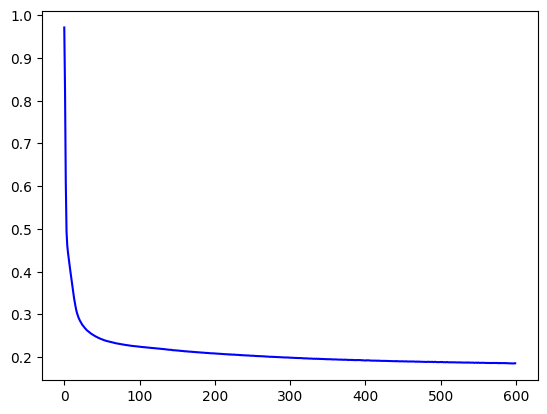

In [ ]:
plt.plot(np.arange(len(losses)), losses, label='Loss Plot', color='blue')

Let's visualize how our predictions look compared to the targets. Obviously, we cannot use all 8 independent variables for our scatter plot, so we will have to pick one feature as our independent variable in the scatter plot.

In [ ]:
# Step 7: Evaluate model


def evaluate(X_test, y_test, model, criterion, batch_size=32):
    """
    Evaluates the trained model on the test dataset.

    Args:
        X_test (numpy.ndarray or torch.Tensor): Test input features.
        y_test (numpy.ndarray or torch.Tensor): Test target values.
        model (torch.nn.Module): The trained neural network model.
        criterion (torch.nn.Module): Loss function (e.g., MSELoss).
        batch_size (int): Batch size for testing.

    Returns:
        float: The average test loss.
    """
    # Convert test data to PyTorch tensors if not already
    if not isinstance(X_test, torch.Tensor):
        X_test = torch.tensor(X_test, dtype=torch.float32)
    if not isinstance(y_test, torch.Tensor):
        y_test = torch.tensor(y_test, dtype=torch.float32)
        if y_test.ndim == 1:
            y_test = y_test.unsqueeze(1)  # Ensure it's a column vector

    # Create DataLoader for test data
    test_dataset = TensorDataset(X_test, y_test)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    model.eval()  # Set model to evaluation mode
    total_loss = 0.0
    with torch.no_grad():  # Disable gradient calculations
        for batch_X, batch_y in test_loader:
            outputs = model(batch_X)  # Forward pass
            loss = criterion(outputs, batch_y)  # Compute loss
            total_loss += loss.item()

    avg_test_loss = total_loss / len(test_loader)
    print(f"Test Loss: {avg_test_loss:.4f}")

    return avg_test_loss

# Step 7: Evaluate model
test_loss = evaluate(test_X, test_y, model_2, criterion)

assert test_loss < 0.6, f"Test loss is too high: {test_loss:.4f}"


Test Loss: 0.3126


Let's contexualize our results, as raw regression loss can be difficult to interpret.

One way we can qualitatively check the performance of our neural network is by comparing the distribution of our predictions to the target values. Some may call this the 'eye-ball' test, or a 'sanity check' on our neural network. Ideally, these distributions should be quite similar. This indicates, to some degree, that our neural network is learning the conditional probability of y given the attributes X.

Let's compare our predictions to the the training and test targets below.


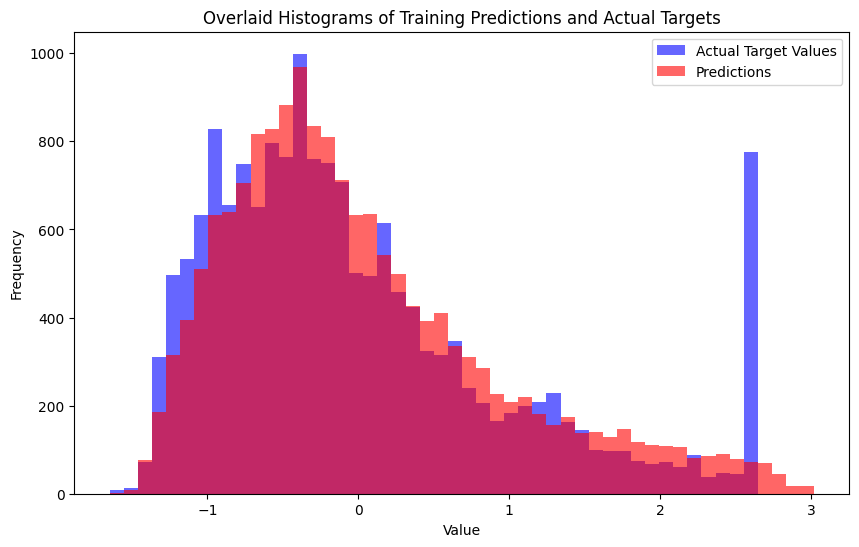

In [ ]:
# Plot your training predictions and target values as overlaid histograms.
# Ensure that the x-range of the hists are identical for adequate comparison.
# X_train_val, X_test, y_train_val, y_test

X_train_val_tensor = torch.tensor(train_X, dtype=torch.float32)
y_train_val_tensor = torch.tensor(train_y, dtype=torch.float32)

# Forward pass to get predictions on the training set
predictions = model_2(X_train_val_tensor).detach().numpy()
y_train_val_np = y_train_val_tensor.numpy()

# Determine a common x-range for both histograms
x_min = min(y_train_val_np.min(), predictions.min())
x_max = max(y_train_val_np.max(), predictions.max())

# Plot the overlaid histograms
plt.figure(figsize=(10, 6))
plt.hist(y_train_val_np, bins=50, alpha=0.6, label="Actual Target Values", color='blue', range=(x_min, x_max))
plt.hist(predictions, bins=50, alpha=0.6, label="Predictions", color='red', range=(x_min, x_max))
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Overlaid Histograms of Training Predictions and Actual Targets")
plt.legend()
plt.show()


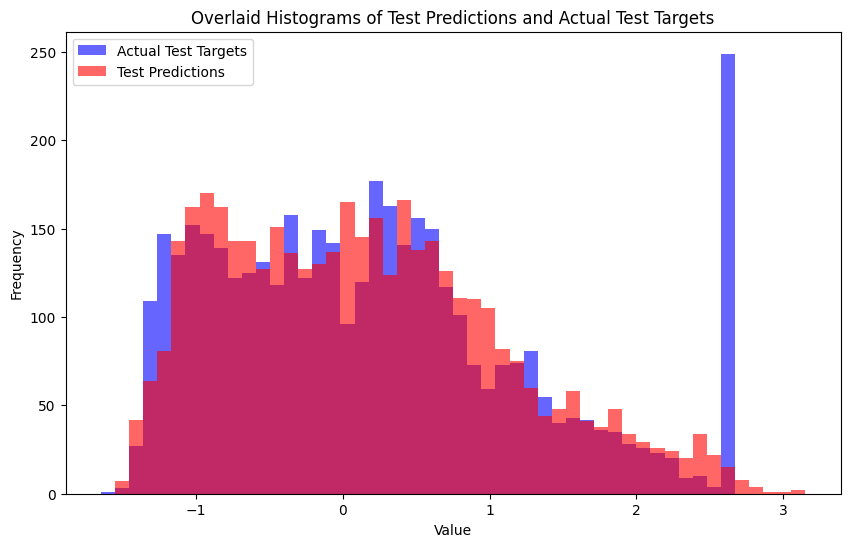

In [ ]:
# Plot the test predictions and target values as overlaid histograms.
# Ensure that the x-range of the hists are identical for adequate comparison.

X_test_tensor = torch.tensor(test_X, dtype=torch.float32)
y_test_tensor = torch.tensor(test_y, dtype=torch.float32)

# Forward pass to get predictions
# predictions =

# Plot the histograms of y_test and test predictions


# Forward pass: get predictions on the test set.
test_predictions = model_2(X_test_tensor).detach().numpy()
y_test_np = y_test_tensor.numpy()

# Determine a common x-range for both histograms.
x_min = min(y_test_np.min(), test_predictions.min())
x_max = max(y_test_np.max(), test_predictions.max())

# Plot the overlaid histograms.
plt.figure(figsize=(10, 6))
plt.hist(y_test_np, bins=50, alpha=0.6, label="Actual Test Targets", color='blue', range=(x_min, x_max))
plt.hist(test_predictions, bins=50, alpha=0.6, label="Test Predictions", color='red', range=(x_min, x_max))
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Overlaid Histograms of Test Predictions and Actual Test Targets")
plt.legend()
plt.show()


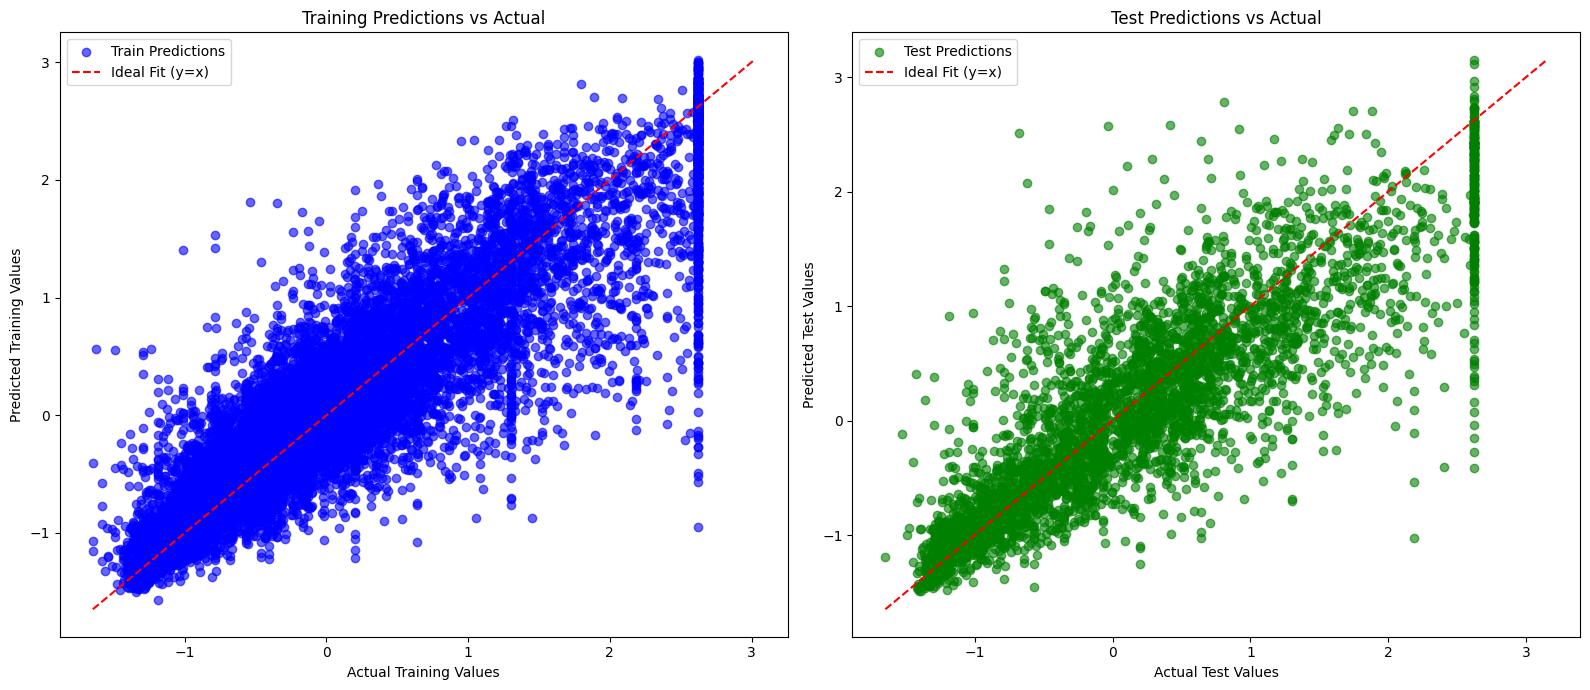

In [ ]:
X_train_tensor = torch.tensor(train_X, dtype=torch.float32)
y_train_tensor = torch.tensor(train_y, dtype=torch.float32)
X_test_tensor  = torch.tensor(test_X, dtype=torch.float32)
y_test_tensor  = torch.tensor(test_y, dtype=torch.float32)

# -----------------------------
# Forward pass: get predictions from the trained model (model_2).
# -----------------------------
train_predictions = model_2(X_train_tensor).detach().numpy()
test_predictions  = model_2(X_test_tensor).detach().numpy()
y_train_np = y_train_tensor.numpy()
y_test_np  = y_test_tensor.numpy()

# -----------------------------
# Create subplots for training and test data scatter plots.
# -----------------------------
fig, axs = plt.subplots(1, 2, figsize=(16, 7))

# ---- Training Data Plot ----
# Determine a common x-range for training data
min_val_train = min(y_train_np.min(), train_predictions.min())
max_val_train = max(y_train_np.max(), train_predictions.max())

axs[0].scatter(y_train_np, train_predictions, alpha=0.6, label="Train Predictions", color='blue')
axs[0].plot([min_val_train, max_val_train],
            [min_val_train, max_val_train],
            'r--', label="Ideal Fit (y=x)")
axs[0].set_xlabel("Actual Training Values")
axs[0].set_ylabel("Predicted Training Values")
axs[0].set_title("Training Predictions vs Actual")
axs[0].legend()

# ---- Test Data Plot ----
# Determine a common x-range for test data
min_val_test = min(y_test_np.min(), test_predictions.min())
max_val_test = max(y_test_np.max(), test_predictions.max())

axs[1].scatter(y_test_np, test_predictions, alpha=0.6, label="Test Predictions", color='green')
axs[1].plot([min_val_test, max_val_test],
            [min_val_test, max_val_test],
            'r--', label="Ideal Fit (y=x)")
axs[1].set_xlabel("Actual Test Values")
axs[1].set_ylabel("Predicted Test Values")
axs[1].set_title("Test Predictions vs Actual")
axs[1].legend()

plt.tight_layout()
plt.show()

> **Question 5c) Describe the difference in distributions between your predictions and targets on the training and test sets. Does this seem reasonable? Are there differences in how your neural network predictions perform on the training vs test tests?**

when looking at the histograms they seem to capture good chunck of the data on both test and training. however when using different diagram (like scattered point and plotting ideal fitting line) they seem to be difference between test and training data sets.

it seems that the test data has different distubtuion than training (more toward -3.

Let's get a quantitative measure of our test performance. We can calculate the $R^2$ measure of our predictions compared to test target values.

> **Question 5d) Explain what the $R^2$ metric measures? Report it for your model below**

R² (R-squared) is a statistical measure used to evaluate the performance of a regression model. It indicates how well the independent variables explain the variability of the dependent variable.

higher r2 score means that the model does good job at predicting the dependant variable or Y based on X

In [ ]:
# Report R^2 here
from sklearn.metrics import r2_score
X_test_tensor = torch.tensor(test_X, dtype=torch.float32)
y_test_tensor = torch.tensor(test_y, dtype=torch.float32)

# Get predictions from the model on the test set
test_predictions = model_2(X_test_tensor).detach().numpy()

# Flatten the predictions and actual target values (if needed)
test_predictions = test_predictions.ravel()
y_test_np = y_test_tensor.numpy().ravel()

# Compute R^2 score
r2 = r2_score(y_test_np, test_predictions)
print(f"R^2: {r2}")

R^2: 0.7235044240951538


0.72 R2 is good enough

Congrats, you finished your first assignment! Feel free to try different architectures, hyperparameters, feature engineering approaches (i.e. standardizing your features), etc... to try to improve your neural network performance. Improving neural network performance is often an emprical process of trying out different configurations.

In [ ]:
# thanks